In [ ]:
import importlib 
import turtle 
from tqdm import tqdm
import random
from typing import Iterable 
import numpy as np
from timeit import Timer
import matplotlib.pyplot as plt
from pythonds3.basic import Stack
import copy
importlib.reload(turtle)

In [2]:
#Chapter 5.5 self check 1

def reverse(s):
    if len(s) <= 1:
        return(s)
    else:
        return  s[-1] + reverse(s[:-1])

#self check 2
def remove_white(s):
    return ''.join([ch for ch in s if ch.isalnum()])

def is_pal(s):
    if len(s) <= 1:
        return True 
    
    if s[0] == s[-1]:
        return is_pal(s[1:-1])
    else:
        return False 


Self check chapter 5.11:
The behaviour of the turtle's path different because the order of the moves determine which path the turtle will first try to exhaust before moving on to another path. So changing the order of the moves will change the order of exploration down the possible paths.


# Programming Exercises

In [3]:
# 1. Write a recursive function to compute the factorial of a number 

def factorial(n):
    #base case - when n <= 1 just return 1 
    assert n > 0
    if n <= 1:
        return 1 
    else:   
        return n * factorial(n-1) 

print(factorial(1))
print(factorial(7))
print(factorial(3))

1
5040
6


In [4]:
# 2. Write a recursive function to reverse a list 

def reverse_list(lst):
    #base case = when len(lst) == 1, return lst 
    #reducing condition = pass list[:-1] into next call
    if len(lst) == 1:
        return lst 
    else:
        return [lst[-1]] + reverse_list(lst[:-1])
        

In [5]:
# 3. modify the recursive tree program using the following ideas:
# 3.1 modify the thickness of the branches so that as the branch_len gets smaller, line gets thinner
# 3.2 modify the color of the branches so that as the branch_len gets very short it is colored like a leaf 
# 3.3 modify the angle used in turning so that at each branch point the angle is selected at random in some range. 
# 3.4 modify the branch_len recursively so that you subtract a random amount in some range.

#self check 2 

def tree(branch_len, t):
    leaf_thresh = 15
    if branch_len > 5:
        # 3.1 line width as a function of branch_len
        t.width(branch_len/20)
        # 3.2 change color of pen if branch_len is < thresh
        if branch_len < leaf_thresh:
            t.color('green')

        t.forward(branch_len)
        # 3.3 choose random angle at each turn
        ang = random.randrange(10, 31)
        # 3.4 choose random subtraction distance
        sub = random.randrange(1, 16)
        t.right(ang)
        tree(branch_len - sub, t)
        t.left(ang*2)
        tree(branch_len - sub, t)
        t.right(ang)
        if branch_len > leaf_thresh:
            # change color back to brown if at non-leaf
            # so backwards trace is correct color 
            t.color('brown')
        t.backward(branch_len)

def draw_tree():
    t = turtle.Turtle()
    my_win = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("brown")
    tree(75, t)
    my_win.exitonclick()
    
draw_tree()

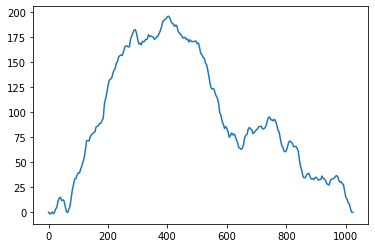

In [11]:
# 4. Find or invent an algorithm for drawing a fractal mountain (2D)
# midpoint displacement method - http://www.mrbertman.com/EE/recursion.pdf
import numpy as np

def midpoint(p1, p2):
    return [(p1[0] + p2[0])/2, (p1[1] + p2[1])/2]

def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1]-p2[1]) ** 2)

def vertical_displacement(p1, p2):
    coeff = random.uniform(-1, 1)
    const = 0.25
    return distance(p1, p2) * coeff * const

def midpoint_displace_2d(p1, p2, n, mids, min_len):
    if n > 0 and distance(p1,p2) >= min_len:
        mid = midpoint(p1, p2)
        #displace y
        mid[1] += vertical_displacement(p1, p2)
        mids.append(mid)
        #call midpoint displace between mid point and two ends
        midpoint_displace_2d(p1, mid, n-1, mids, min_len)
        midpoint_displace_2d(p2, mid, n-1, mids, min_len)

n = 8
mids = []
end = 1024
midpoint_displace_2d([0, 0], [end, 0], n, mids, end/2**n)

mids.insert(0, [0, 0])
mids.append([end, 0])
mids = sorted(mids, key=lambda m: m[0])
mids = np.array(mids)

x = mids[:, 0]
y = mids[:, 1]
plt.plot(x, y)


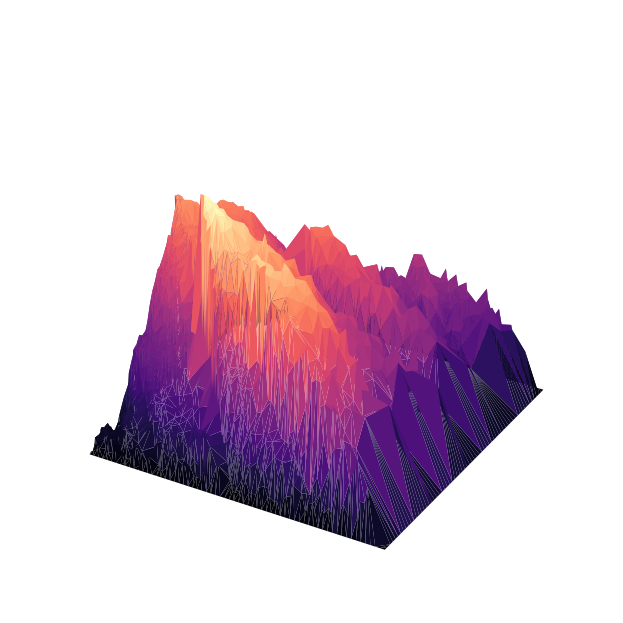

In [28]:
#3D fractal mountain
def midpoint_nd(points, dims=3):
    dim_mids = []
    for dim in range(dims):
        dim_mids.append(sum([p[dim] for p in points]) / len(points))
    return dim_mids

def distance_nd(p1, p2, dims=2):
    return np.sqrt(sum([(p1[dim] - p2[dim])**2 for dim in range(dims)]))

def vertical_displacement_nd(p1, p2, coeff_min=0, coeff_max=1, const=0.05, coeff=None):
    if coeff is None:
        coeff = random.uniform(coeff_min, coeff_max)
    return distance(p1, p2) * coeff * const

def on_edge(pt, end):
    return any([pt[0] == 0, pt[0] == end, pt[1] == 0, pt[1] == end])

def midpoint_displace_3d(p1, p2, p3, p4, n, mids, min_len, end, include_edge=True):
    if n > 0 and distance_nd(p1,p2) >= min_len:
        mid = midpoint_nd([p1, p2])
        #displace y
        mid[2] += vertical_displacement_nd(p1, p2)
        mids.append(mid)
        #including edge points to round out mountain
        if include_edge:
            for pt in [p1, p2, p3, p4]:
                if on_edge(pt, end):
                    if pt not in mids:
                        mids.append(pt)
        
        #call midpoint displace between new quadrilaterals
        midpoint_displace_3d(p1, midpoint_nd([p1, p2]), mid, midpoint_nd([p1, p4]), n-1, mids, min_len, end)
        midpoint_displace_3d(midpoint_nd([p1, p2]), p2, midpoint_nd([p2, p3]), mid, n-1, mids, min_len, end)
        midpoint_displace_3d(mid, midpoint_nd([p2, p3]), p3, midpoint_nd([p3, p4]), n-1, mids, min_len, end)
        midpoint_displace_3d(midpoint_nd([p1, p4]), mid, midpoint_nd([p3, p4]), p4, n-1, mids, min_len, end)

n = 7
end = 1024
mids = []
midpoint_displace_3d([0, 0, 0], [0, end, 0], [end, end, 0], [end, 0, 0], n, mids, end/2**n, end)

#plot 
fig = plt.figure(figsize =(8, 8), dpi=100)
ax = plt.axes(projection ='3d')
mids = np.array(mids)

surf = ax.plot_trisurf(mids[:,0], mids[:, 1], mids[:, 2], cmap='magma',
                    edgecolor='none', linewidth=2)

plt.axis('off')
plt.show()



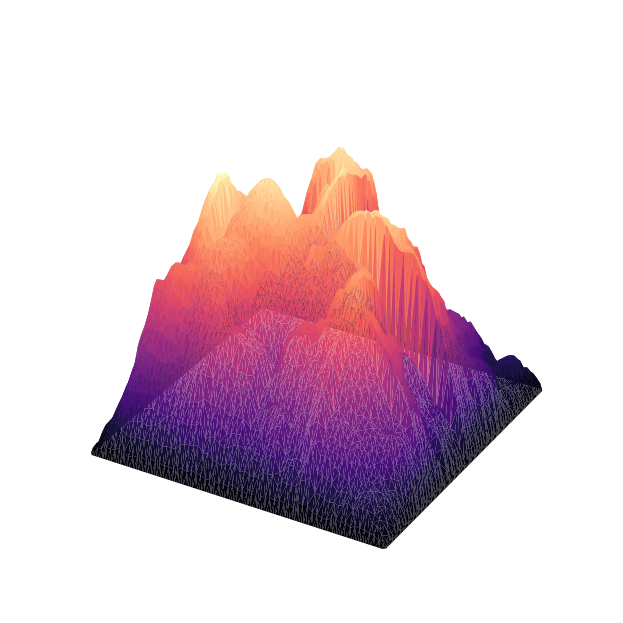

In [29]:
#Diamond Square Algorithm - 3D fractal mountain
def get_coeff(pt, coeffs, end, coeff_min=0, coeff_max=1, const=0.05, displace_once=True):
    if tuple(pt) in coeffs:
        #keep coef the same if already generated or return 0
        if displace_once:
            return 0
        else:
            return coeffs[tuple(pt)]
    else:
        if any([pt[0] == 0, pt[1] == 0, pt[0] == end, pt[1] == end]):
            #if point == edge avoid displacement
            return 0
        coeff = random.uniform(coeff_min, coeff_max) * const
        coeffs.update({tuple(pt): coeff})
        return coeff

def diamond_square(p1, p2, p3, p4, n, mids, min_len, coeffs, end, include_edge=True):
    if n > 0 and distance_nd(p1,p2) >= min_len:
        mid = midpoint_nd([p1, p2, p3, p4])
        #displace y
        mid[2] += vertical_displacement_nd(p1, p2, coeff=get_coeff(mid, coeffs, end))
        mids.append(mid)
        #additional step: also displace the midpoints zs! 
        E = midpoint_nd([p1, p2]) #E = midpoint p1, p2
        E[2] += vertical_displacement_nd(p1, p2, coeff=get_coeff(E, coeffs, end))
        F = midpoint_nd([p2, p3]) #F = midpoint p2, p3
        F[2] += vertical_displacement_nd(p2, p3, coeff=get_coeff(F, coeffs, end))
        G = midpoint_nd([p3, p4]) #G = midpoint p3, p4
        G[2] += vertical_displacement_nd(p3, p4, coeff=get_coeff(G, coeffs, end))
        H = midpoint_nd([p1, p4]) #H = midpoint p1, p4
        H[2] += vertical_displacement_nd(p1, p4, coeff=get_coeff(H, coeffs, end))

        if include_edge:
            for pt in [E, F, G, H]:
                if on_edge(pt, end):
                    if pt not in mids:
                        mids.append(pt)

        #call midpoint displace between new quadrilaterals
        diamond_square(p1, E, mid, H, n-1, mids, min_len, coeffs, end)
        diamond_square(E, p2, F, mid, n-1, mids, min_len, coeffs, end)
        diamond_square(mid, F, p3, G, n-1, mids, min_len, coeffs, end)
        diamond_square(H, mid, G, p4, n-1, mids, min_len, coeffs, end)

n = 7
end = 1024
mids = []
#coeff matrix to counter the fact that b/c quadrilateral transformations don't know what each other are doing, so square transforms cause
#discrepancies in final z
coeffs = {}
diamond_square([0, 0, 0], [0, end, 0], [end, end, 0], [end, 0, 0], n, mids, end/2**n, coeffs, end)

#plot 
fig = plt.figure(figsize =(8, 8), dpi=100)
ax = plt.axes(projection ='3d')
mids = np.array(mids)

surf = ax.plot_trisurf(mids[:,0], mids[:, 1], mids[:, 2], cmap='magma',
                    edgecolor='none', linewidth=2)

plt.axis('off')
plt.show()

In [65]:
# 5. Write a recursive function to compute the Fibonacci sequence. 
# How does the performance of the recursive function compare to that of an iterative version?

def iterative_fib(n):
    assert n > 0
    fibs = [0, 1]
    for _ in range(n-2):
        fibs.append(fibs[-1] + fibs[-2])
    return fibs[n-1]

def recursive_fib(n):
    #base case is when n == 1 or n == 0 (starting numbers)
    assert n > 0
    if n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return recursive_fib(n-1) + recursive_fib(n-2)

for i in range(1, 12):
    assert recursive_fib(i) == iterative_fib(i)


100%|██████████| 30/30 [00:08<00:00,  3.48it/s] 


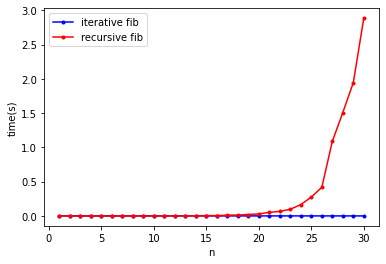

In [79]:
#Recursive vs iterative performance comparison 
X = []
Y1 = []# pystack push
Y2 = [] # llstack push
number = 10
for size in tqdm(range(1, 31)):
    #test push 
    t1 = Timer(f"iterative_fib({size})", "from __main__ import iterative_fib")
    Y1.append(t1.timeit(number=number))
    t2 = Timer(f"recursive_fib({size})", "from __main__ import recursive_fib")
    Y2.append(t2.timeit(number=number))
    X.append(size)

plt.plot(X, Y1, color='blue', marker='.', label='iterative fib')
plt.plot(X, Y2, color='red', marker='.', label='recursive fib')

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

### Comparison between recursive and iterative fib:
From the short experiment, we can see that recursive fib's run time increases exponentially. This is because in recursion, we do a lot of repeated calculations (such as in recursive_fib(5), recursive_fib(4) and recursive_fib(3) will be called in the initial function call, which contains repeats such as in recursive_fib(4), recursive_fib(3) is called again.) To add to that, calling functions is an expensive operation in python, b/c of the creation of a new stack frame to be executed. In comparison, iterative_fib is a form of dynamic programming, where we use previous results to obtain the current iteration's result, resulting in much better run time.

In [144]:
# 6. Implement a solution to the Tower of Hanoi using three stacks to keep track of the disks.

def move_disk(from_stack, to_stack):
    if not to_stack.is_empty():
        assert from_stack.peek() < to_stack.peek()
    print(f'moving from {from_stack.name} to {to_stack.name}')
    to_stack.push(from_stack.pop())

def print_stacks(stacks):
    stack_dict = {}
    total = 0
    for s in stacks:
        stack_dict.update({s.name: copy.deepcopy(s)})
        total += s.size()
    stack_dict['total'] = total
    print('A\t\tB\t\tC')
    while stack_dict['total']:
        curr_str = ''
        for name in ['A', 'B', 'C']:
            if not stack_dict[name].is_empty():
                curr_str = curr_str + str(stack_dict[name].pop()) + '\t\t'
                stack_dict['total'] -= 1
            else:
                curr_str = curr_str + '||' + '\t\t'
        print(curr_str)

def move_tower(n_disks, from_stack, to_stack, with_stack, print_moves=False):
    if n_disks >= 1:
        #move tower of n-1 to with_stack, to free up bottom disk at from_stack
        move_tower(n_disks-1, from_stack, with_stack, to_stack, print_moves=print_moves)
        #move_disk from from_stack to to_stack
        move_disk(from_stack, to_stack)
        if print_moves:
            print_stacks([from_stack, to_stack, with_stack])
        #move remaining tower from with_stack back to to_stack
        move_tower(n_disks-1, with_stack, to_stack, from_stack, print_moves=print_moves)

n_disks = 2
print_moves = True
stacks = [Stack() for _ in range(3)]
for i, name in enumerate(['A', 'C', 'B']):
    stacks[i].name = name

for i in range(n_disks, 0, -1):
    stacks[0].push(i)

if print_moves:
    print_stacks(stacks)
move_tower(n_disks, *stacks, print_moves=print_moves)

A		B		C
1		||		||		
2		||		||		
moving from A to B
A		B		C
2		1		||		
moving from A to C
A		B		C
||		1		2		
moving from B to C
A		B		C
||		||		1		
||		||		2		


In [ ]:
# 7. Using the turtle graphics module, write a recursive program to display a Hilbert curve.
